# Hotel Booking Demand Analysis
## Business Questions & Exploratory Analysis
---
## 1. Introduction

Notebook này thực hiện **phân tích dữ liệu theo góc nhìn kinh doanh** nhằm hiểu rõ các mô hình chính trong nhu cầu đặt phòng khách sạn.

Trong khi notebook trước thực hiện khám phá dữ liệu tổng quát (EDA) và tiền xử lý dữ liệu, notebook này chuyển trọng tâm sang việc **đặt câu hỏi kinh doanh và phân tích khám phá có mục tiêu**, nhằm rút ra các insight phục vụ cho các quyết định về giá, marketing và vận hành khách sạn.

Mục tiêu của notebook là phân tích và trả lời ba câu hỏi kinh doanh trọng tâm liên quan đến:
- **Seasonality of Hotel Demand** - sự biến động theo mùa của nhu cầu đặt phòng
- **Revenue Contribution by Market Segment** - mức độ đóng góp doanh thu của từng phân khúc khách hàng
- **Geographic Distribution of Guests** - phân bố địa lý của khách hàng theo quốc gia

Những insight thu được từ các phân tích trên mang lại giá trị trực tiếp cho **hotel managers, revenue analysts và marketing teams**, giúp họ hiểu rõ hơn hành vi khách hàng, từ đó tối ưu chiến lược giá và phân bổ nguồn lực một cách hiệu quả hơn.

## 2. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

df = pd.read_csv("../data/processed/clean_data.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 3. Question Formulation 
---
### Q1 - Seasonality of Hotel Demand

#### 1. The Question
**Q1:** *Nhu cầu đặt phòng khách sạn (số lượng booking, ADR và tổng số đêm lưu trú) thay đổi như thế nào theo các tháng và các năm đối với City Hotel và Resort Hotel?*

Đây là một câu hỏi định hướng dữ liệu, tập trung vào việc phân tích **sự biến động theo mùa** trong nhu cầu và giá phòng khách sạn.

#### 2. Motivation & Benefits
Tính mùa vụ là một trong những yếu tố có ảnh hưởng lớn nhất đến hiệu quả kinh doanh của khách sạn.

**Vì sao câu hỏi này đáng được phân tích?**
- Nhu cầu lưu trú thường biến động theo kỳ nghỉ, điều kiện thời tiết, lịch học và chu kỳ du lịch.
- Những biến động này tác động trực tiếp đến chiến lược giá, doanh thu, kế hoạch nhân sự và khả năng sẵn sàng trong vận hành.

**Những insight nào có thể rút ra từ câu hỏi này?**
- Xác định các tháng cao điểm và thấp điểm trong năm  
- Quan sát sự thay đổi của giá phòng trung bình (ADR) theo thời gian  
- So sánh đặc điểm biến động theo mùa giữa City Hotel và Resort Hotel  
- Hỗ trợ ước lượng mức độ sử dụng phòng theo từng thời điểm, phục vụ cho việc lập kế hoạch và ngân sách.

**Những đối tượng nào quan tâm đến insight này?**
- **Bộ phận quản lý doanh thu** (điều chỉnh giá linh hoạt)  
- **Bộ phận vận hành** (lập kế hoạch nhân sự, housekeeping)  
- **Bộ phận marketing** (xác định thời điểm triển khai chiến dịch)  
- **Ban điều hành khách sạn** (chiến lược và ngân sách)  

**Kết quả phân tích này giúp hỗ trợ những quyết định nào trong thực tế?**
- Thời điểm tăng hoặc giảm giá phòng (ADR)  
- Thời điểm triển khai các chương trình khuyến mãi  
- Quy mô nhân sự theo mùa cao điểm và thấp điểm  
- Lập kế hoạch cho các gói dịch vụ và sự kiện theo mùa  

---
### Q2 - Revenue Contribution by Market Segment

#### 1. The Question
**Q2:** *Những phân khúc khách hàng nào mang lại doanh thu cao nhất cho khách sạn?*  

Trong phân tích này, doanh thu được **xấp xỉ** theo công thức:  
**Revenue = ADR x Total Stay Nights**

Cách tiếp cận này cho phép so sánh tương đối mức độ đóng góp doanh thu giữa các phân khúc khách hàng khác nhau dựa trên dữ liệu hiện có.

#### 2. Motivation & Benefits

Khách sạn phục vụ nhiều phân khúc khách hàng khác nhau thông qua các kênh đặt phòng đa dạng, bao gồm đặt phòng trực tiếp, khách công tác, đại lý du lịch trực tuyến và truyền thống (OTA/TA), khách đoàn, cũng như một số phân khúc đặc thù khác.

**Vì sao câu hỏi này đáng được phân tích?**
- Giúp xác định những phân khúc khách hàng mang lại giá trị doanh thu cao nhất  
- Làm rõ kênh đặt phòng nào tạo ra doanh thu "chất lượng", không chỉ dựa trên số lượng booking  
- Cung cấp cơ sở để phân bổ ngân sách marketing một cách hiệu quả hơn  

**Những insight nào có thể rút ra từ câu hỏi này?**
- Xếp hạng các phân khúc khách hàng theo mức độ đóng góp doanh thu  
- So sánh mức giá phòng trung bình (ADR) giữa các phân khúc  
- Quan sát sự khác biệt về thời gian lưu trú hoặc hành vi hủy đặt phòng  

**Những đối tượng nào quan tâm đến insight này?**
- **Bộ phận marketing** (phân bổ ngân sách quảng cáo)  
- **Bộ phận sales** (đàm phán với các OTA và đối tác)  
- **Bộ phận quản lý doanh thu** (tập trung vào phân khúc sinh lợi cao)  
- **Ban quản lý khách sạn** (hoạch định chiến lược dài hạn)  

**Kết quả phân tích này giúp hỗ trợ những quyết định nào trong thực tế?**
- Có nên đẩy mạnh kênh **đặt phòng trực tiếp** hay không?  
- Những kênh đặt phòng nào tạo ra nhiều booking nhưng đóng góp doanh thu tương đối thấp so với số lượng booking?
- Phân khúc khách hàng nào nên được ưu tiên trong các chương trình khách hàng thân thiết?  

--- 
### Q3 - Geographic Distribution of Guests

#### 1. The Question
**Q3:** *Những quốc gia nào đóng góp nhiều lượt khách và doanh thu nhất cho khách sạn, và mức độ tập trung của nguồn khách theo từng quốc gia như thế nào?*

#### 2. Motivation & Benefits

Việc hiểu rõ nguồn gốc địa lý của khách hàng đóng vai trò quan trọng trong việc xây dựng chiến lược marketing, mở rộng thị trường và thiết lập các mối quan hệ đối tác phù hợp.

**Vì sao câu hỏi này đáng được phân tích?**
- Hành vi du lịch và mức chi tiêu có thể khác nhau đáng kể giữa các quốc gia  
- Giúp xác định các thị trường quốc tế có tiềm năng cao  
- Hỗ trợ xây dựng các chiến lược marketing nhắm mục tiêu theo từng quốc gia  

**Những insight nào có thể rút ra từ câu hỏi này?**
- Xác định các quốc gia có số lượng khách lưu trú cao nhất  
- Phân tích mức độ đóng góp doanh thu theo từng quốc gia  
- Quan sát sự khác biệt về tỷ lệ hủy đặt phòng giữa các quốc gia  
- Đánh giá mức độ đa dạng của nguồn khách (khách nội địa so với khách quốc tế)  

**Những đối tượng nào quan tâm đến insight này?**
- **Bộ phận marketing quốc tế** (chọn thị trường và ngân sách quảng bá)  
- **Bộ phận xây dựng thương hiệu của chuỗi khách sạn** (định vị theo từng thị trường)
- **Các đối tác đại lý và hãng du lịch** (mở rộng hợp tác khu vực)
- **Nhà phân tích du lịch và thị trường** (đánh giá xu hướng nguồn khách)

**Kết quả phân tích này giúp hỗ trợ những quyết định nào trong thực tế?**
- Có nên đầu tư ngân sách quảng cáo vào các thị trường quốc gia cụ thể hay không?  
- Những thị trường nào cần được ưu tiên trong việc bản địa hóa nội dung quảng bá (ngôn ngữ, thông điệp)?  
- Có nên mở rộng hoặc tăng cường hợp tác với các đối tác du lịch tại một số thị trường quốc gia cụ thể hay không?
 

## 4. Data Analysis 
Phần này triển khai phân tích dữ liệu nhằm trả lời các câu hỏi nghiên cứu đã được xác định ở trên.  
Dữ liệu sử dụng được lấy từ tập dữ liệu đã được làm sạch và chuẩn hóa ở Notebook 2 - Data Preprocessing.

---
### Q1 - Seasonality of Hotel Demand
*Nhu cầu đặt phòng khách sạn (số lượng booking, ADR và tổng số đêm lưu trú) thay đổi như thế nào theo các tháng và các năm đối với City Hotel và Resort Hotel?*
#### A. Preprocessing
Các bước xử lý:
- Tạo biến đo **tổng số đêm lưu trú** nhằm phản ánh nhu cầu lưu trú của mỗi lượt đặt phòng:  
  `total_stay_nights` = `stays_in_week_nights` + `stays_in_weekend_nights`

In [2]:
# Copy dataset for Q1 analysis
df_q1 = df.copy()

# Total stay nights per booking
df_q1["total_stay_nights"] = (
    df_q1["stays_in_week_nights"] + df_q1["stays_in_weekend_nights"]
)

print("Q1 preprocessing completed.")
df_q1[["total_stay_nights", "adr"]].describe().round(2)

Q1 preprocessing completed.


,total_stay_nights,adr
count,87010.00,87010.00
mean,3.63,106.58
std,2.74,54.91
min,0.00,0.00
25%,2.00,72.25
50%,3.00,98.33
75%,5.00,134.10
max,69.00,5400.00


#### B. Analysis
Phân tích Q1 nhằm đánh giá **tính mùa vụ của nhu cầu khách sạn** theo thời gian và so sánh giữa *City Hotel* và *Resort Hotel*.

Phân tích tập trung vào bốn chỉ số chính:
- **Số lượng booking** theo tháng và năm để xác định các giai đoạn cao điểm và thấp điểm.
- **Giá phòng trung bình (ADR)** theo thời gian nhằm đánh giá sự điều chỉnh giá theo mùa.
- **Số đêm lưu trú trung bình (`total_stay_nights`)** để phản ánh cường độ lưu trú trong từng giai đoạn.
- **Tỷ lệ hủy đặt phòng (`cancel_rate`)** nhằm đánh giá mức độ không chắc chắn trong hành vi đặt phòng.

Dữ liệu được **tổng hợp theo tháng và năm**, sau đó sử dụng **giá trị trung bình theo tháng qua các năm** để làm nổi bật các mẫu mùa vụ chung và giảm ảnh hưởng của biến động riêng lẻ theo từng năm.  

In [3]:
# Monthly stats by hotel + year + month
monthly_stats = (
    df_q1.groupby(["hotel", "arrival_date_year", "arrival_date_month"], observed=True)
    .agg(
        bookings=("is_canceled", "count"),
        avg_adr=("adr", "mean"),
        avg_stay_nights=("total_stay_nights", "mean"),
        cancel_rate=("is_canceled", "mean")  
    )
    .reset_index()
)

print("=== Monthly stats (hotel-year-month) ===")
print("Shape:", monthly_stats.shape)
print(monthly_stats.head())

# Average across years to highlight seasonality (mean month pattern)
seasonality_avg = (
    monthly_stats.groupby(["hotel", "arrival_date_month"], observed=True)
    .agg(
        bookings=("bookings", "mean"),
        avg_adr=("avg_adr", "mean"),
        avg_stay_nights=("avg_stay_nights", "mean"),
        cancel_rate=("cancel_rate", "mean")
    )
    .reset_index()
)

print("\n=== Seasonality (average across years) ===")

print("\nAverage monthly bookings:")
print(
    seasonality_avg
    .pivot(index="arrival_date_month", columns="hotel", values="bookings")
    .round(1)
)

print("\nAverage monthly ADR:")
print(
    seasonality_avg
    .pivot(index="arrival_date_month", columns="hotel", values="avg_adr")
    .round(2)
)

print("\nAverage monthly stay nights:")
print(
    seasonality_avg
    .pivot(index="arrival_date_month", columns="hotel", values="avg_stay_nights")
    .round(2)
)

print("\nAverage monthly cancellation rate (%):")
print(
    seasonality_avg
    .pivot(index="arrival_date_month", columns="hotel", values="cancel_rate")
    .multiply(100)
    .round(2)
)

=== Monthly stats (hotel-year-month) ===
Shape: (52, 7)
        hotel  arrival_date_year  arrival_date_month  bookings     avg_adr  \
0  City Hotel               2015                   7       393   67.153028   
1  City Hotel               2015                   8      1097   83.718250   
2  City Hotel               2015                   9      1667  107.116053   
3  City Hotel               2015                  10      1553   95.409961   
4  City Hotel               2015                  11       795   74.078579   

   avg_stay_nights  cancel_rate  
0         3.470738     0.590331  
1         2.983592     0.208751  
2         2.847630     0.187762  
3         2.829363     0.185448  
4         3.017610     0.172327  

=== Seasonality (average across years) ===

Average monthly bookings:
hotel               City Hotel  Resort Hotel
arrival_date_month                          
1                       1353.0         980.5
2                       1786.5        1246.0
3                   

#### C. Results & Interpretation

##### Visualizations

Phần này trình bày kết quả phân tích mùa vụ thông qua các trực quan nhằm làm rõ sự khác biệt theo thời gian và giữa hai loại khách sạn (*City Hotel* và *Resort Hotel*).

- **Line charts** được sử dụng để so sánh xu hướng theo tháng của:
  - số lượng booking
  - giá phòng trung bình (ADR)
  - số đêm lưu trú trung bình
  - tỷ lệ hủy đặt phòng
- **Heatmap (year x month)** được sử dụng để làm nổi bật các mẫu mùa vụ lặp lại theo từng năm, đặc biệt đối với số lượng booking.

Các trực quan này cho phép đánh giá đồng thời mức độ mùa vụ, cường độ lưu trú và hành vi hủy đặt phòng theo thời gian.

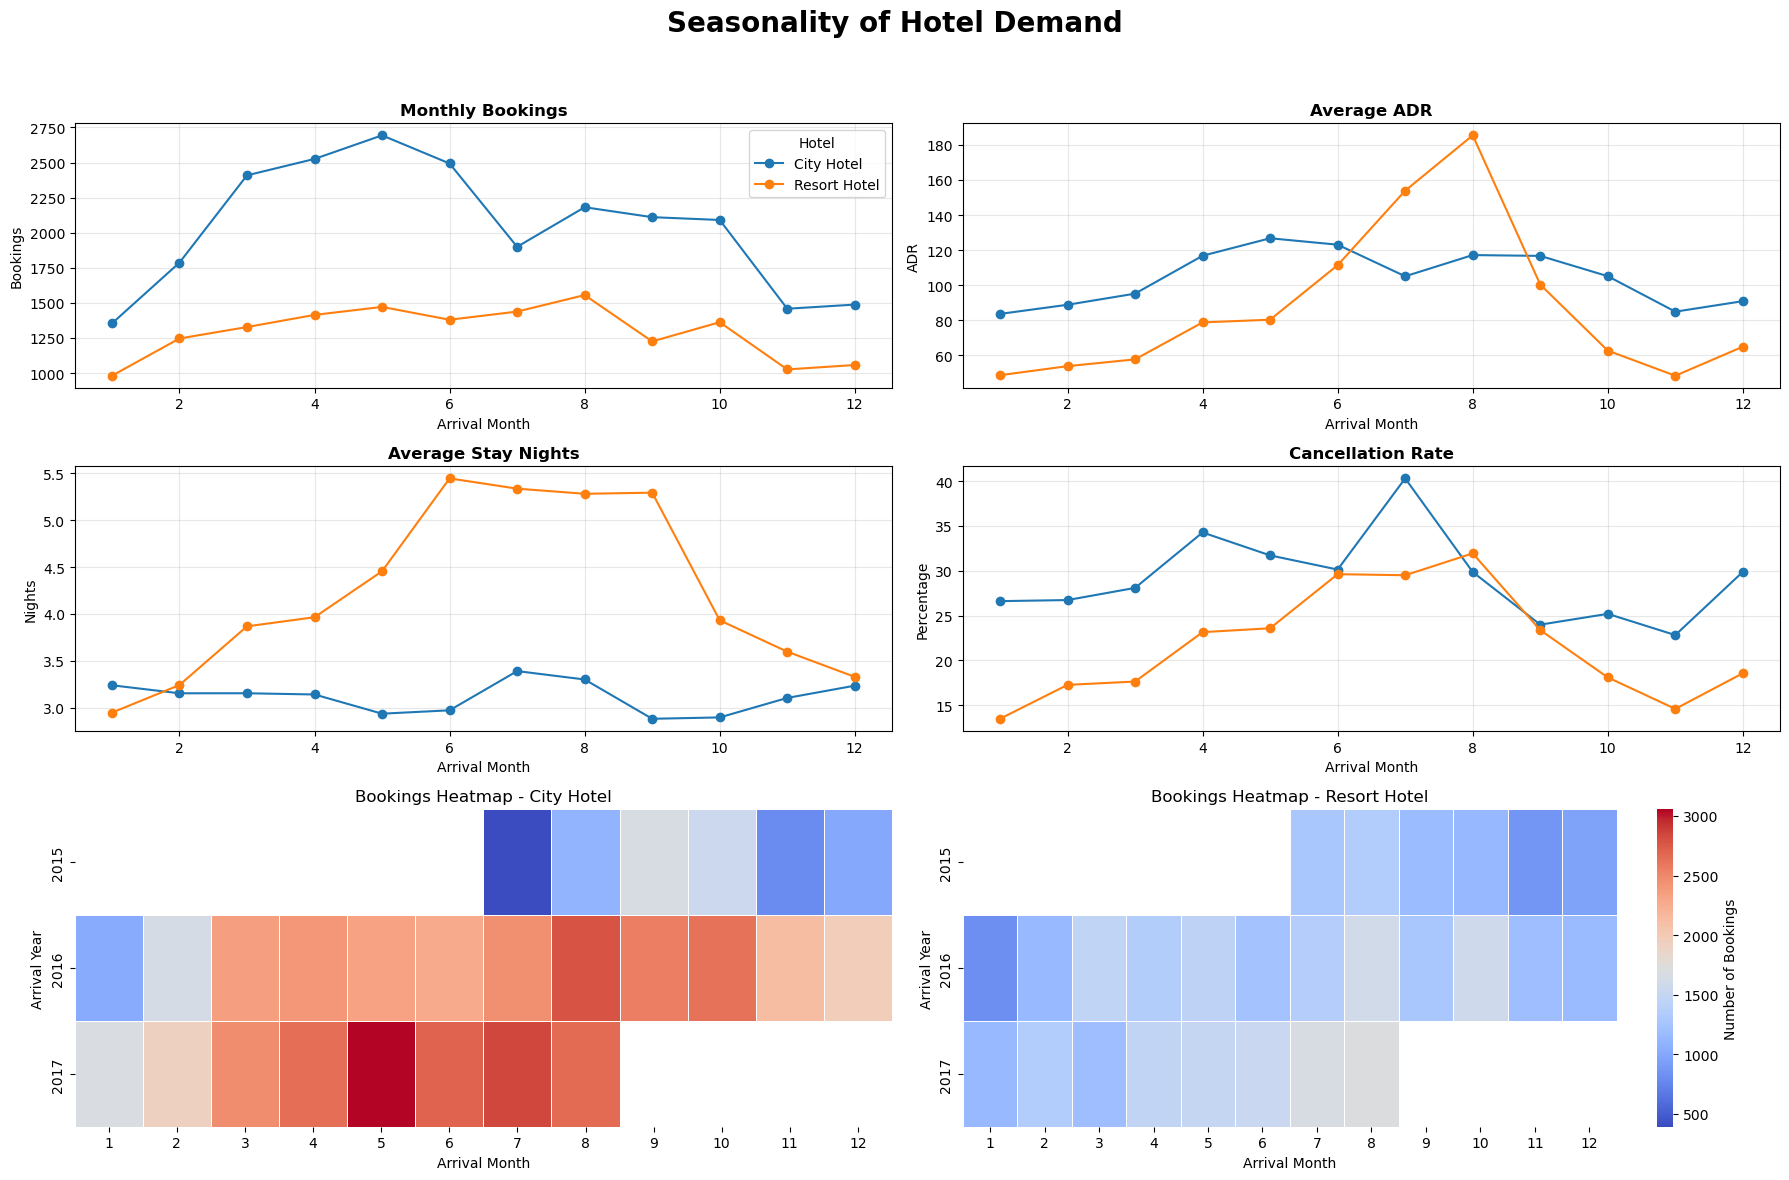

In [4]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1.2])

fig.suptitle(
    "Seasonality of Hotel Demand",
    fontsize=20,
    fontweight="bold"
)

# ---------- LINE CHARTS ----------

plots = [
    ("bookings", "Monthly Bookings", "Bookings"),
    ("avg_adr", "Average ADR", "ADR"),
    ("avg_stay_nights", "Average Stay Nights", "Nights"),
    ("cancel_rate", "Cancellation Rate", "Percentage")
]

for idx, (col, title, ylabel) in enumerate(plots):
    row, col_idx = divmod(idx, 2)
    ax = fig.add_subplot(gs[row, col_idx])

    for hotel in seasonality_avg["hotel"].unique():
        data = seasonality_avg[seasonality_avg["hotel"] == hotel]

        y = data[col]
        if col == "cancel_rate":
            y = y * 100  # convert to percentage

        ax.plot(
            data["arrival_date_month"],
            y,
            marker="o",
            label=hotel
        )

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel("Arrival Month")
    ax.set_ylabel(ylabel)
    ax.grid(alpha=0.3)

    if idx == 0:
        ax.legend(title="Hotel")

# ---------- HEATMAPS ----------
vmin = monthly_stats["bookings"].min()
vmax = monthly_stats["bookings"].max()

hotels = ["City Hotel", "Resort Hotel"]

for col_idx, hotel in enumerate(hotels):
    ax = fig.add_subplot(gs[2, col_idx])

    heatmap_data = (
        monthly_stats[monthly_stats["hotel"] == hotel]
        .pivot_table(
            index="arrival_date_year",
            columns="arrival_date_month",
            values="bookings",
            aggfunc="sum"
        )
    )

    sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        vmin=vmin,
        vmax=vmax,
        linewidths=0.5,
        ax=ax,
        cbar=(col_idx == 1),
        cbar_kws={"label": "Number of Bookings"}
    )

    ax.set_title(f"Bookings Heatmap - {hotel}")
    ax.set_xlabel("Arrival Month")
    ax.set_ylabel("Arrival Year")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


##### Written Analysis
Kết quả cho thấy **nhu cầu đặt phòng có tính mùa vụ rõ rệt** và **khác nhau giữa City Hotel và Resort Hotel**. City Hotel có lượng booking cao nhất vào **mùa xuân-đầu hè (tháng 3-6)**, với đỉnh **tháng 5 khoảng 2694 bookings**, trong khi Resort Hotel nổi bật vào **mùa hè (tháng 6-8)**, đạt đỉnh **tháng 8 khoảng 1555 bookings**.

Giá phòng trung bình (**ADR**) phản ánh rõ chiến lược theo mùa. Resort Hotel có ADR tăng mạnh vào mùa cao điểm, cao nhất **tháng 8: 185.40**, trong khi City Hotel ổn định hơn và đạt mức cao nhất **tháng 5: 126.77**. Đồng thời, khách tại Resort Hotel có thời gian lưu trú **dài hơn đáng kể** trong mùa hè (**trên 5 đêm**), còn City Hotel duy trì quanh **3 đêm**.

Tỷ lệ hủy đặt phòng cũng biến động theo mùa. City Hotel có mức hủy cao và biến động mạnh, đặc biệt **tháng 7: 40.30%**, trong khi Resort Hotel tăng hủy vào mùa hè, cao nhất **tháng 8: 31.94%**. Điều này cho thấy mùa cao điểm không chỉ mang lại nhu cầu cao mà còn đi kèm rủi ro hủy booking.

Về mặt thực tiễn, Resort Hotel nên tập trung chiến lược giá và nguồn lực vào **mùa hè**, còn City Hotel nên tối ưu công suất vào **mùa xuân-đầu hè**. Tuy nhiên, kết quả dựa trên **trung bình theo tháng qua các năm**, nên có thể chưa phản ánh đầy đủ biến động riêng của từng năm và không đo trực tiếp công suất phòng thực tế.

---
### Q2 - Revenue Contribution by Market Segment
*Những phân khúc khách hàng nào mang lại doanh thu cao nhất cho khách sạn?*

#### A. Preprocessing
Tạo biến doanh thu xấp xỉ cho mỗi booking để so sánh mức độ đóng góp giữa các phân khúc khách hàng.

Các bước xử lý:
- Sử dụng biến `total_stay_nights` đã tạo ở Q1
- Tính **revenue proxy** theo công thức: Revenue = ADR × Total Stay Nights
- Chỉ dùng để **so sánh tương đối** giữa các phân khúc (không phải doanh thu kế toán thực tế)

In [5]:
# Copy dataset for Q2 analysis
df_q2 = df_q1.copy()

# Revenue proxy per booking
df_q2["revenue_proxy"] = df_q2["adr"] * df_q2["total_stay_nights"]

print("Q2 preprocessing completed.")
df_q2[["revenue_proxy", "adr", "total_stay_nights"]].describe().round(2)

Q2 preprocessing completed.


,revenue_proxy,adr,total_stay_nights
count,87010.00,87010.00,87010.00
mean,395.22,106.58,3.63
std,369.74,54.91,2.74
min,0.00,0.00,0.00
25%,153.00,72.25,2.00
50%,299.20,98.33,3.00
75%,504.00,134.10,5.00
max,7590.00,5400.00,69.00


#### B. Analysis
Phân tích Q2 tập trung vào **market_segment** - đại diện cho các kênh và phân khúc khách hàng khác nhau.

Các chỉ số chính được sử dụng:
- **Total revenue proxy**: tổng doanh thu xấp xỉ của mỗi phân khúc
- **Average revenue per booking**: chất lượng doanh thu trên mỗi lượt đặt
- **ADR trung bình**: mức giá phòng đặc trưng của phân khúc
- **Số lượng booking**: quy mô đóng góp về mặt số lượng

Dữ liệu được tổng hợp theo **market_segment** để:
- Xếp hạng các phân khúc theo mức độ đóng góp doanh thu
- So sánh giữa "nhiều booking" và "doanh thu cao"

In [6]:
# Aggregate revenue metrics by market segment
segment_revenue = (
    df_q2.groupby("market_segment", observed=True)
    .agg(
        bookings=("market_segment", "count"),
        total_revenue=("revenue_proxy", "sum"),
        avg_revenue_per_booking=("revenue_proxy", "mean"),
        avg_adr=("adr", "mean")
    )
    .reset_index()
)

# Sort by total revenue contribution
segment_revenue = segment_revenue.sort_values(
    "total_revenue",
    ascending=False
)

print("=== Revenue contribution by market segment ===")
print(segment_revenue.round(2))

=== Revenue contribution by market segment ===
  market_segment  bookings  total_revenue  avg_revenue_per_booking  avg_adr
4      Online TA     51370    22201278.91                   432.18   118.40
3  Offline TA/TO     13852     5416185.95                   391.00    81.96
1         Direct     11751     4849639.98                   412.70   116.95
2         Groups      4921     1238520.72                   251.68    75.18
0      Corporate      4200      594144.08                   141.46    68.34
5          Other       914       88101.88                    96.39    27.21
6      Undefined         2          48.00                    24.00    15.00


#### C. Results & Interpretation

##### Visualizations
**Bar charts** được sử dụng để minh họa sự khác biệt giữa các phân khúc khách hàng theo ba khía cạnh chính:
- **Tổng doanh thu xấp xỉ (revenue proxy)**, phản ánh quy mô đóng góp doanh thu của từng phân khúc.
- **Doanh thu trung bình trên mỗi lượt đặt phòng**, phản ánh giá trị và chất lượng doanh thu của mỗi phân khúc.
- **Số lượng booking**, phản ánh quy mô nhu cầu và mức độ phổ biến của từng phân khúc.

Các trực quan này cho phép so sánh đồng thời giữa các phân khúc có **quy mô booking lớn** và các phân khúc có **giá trị doanh thu cao trên mỗi booking**, từ đó làm rõ sự khác biệt giữa "nhiều booking" và "doanh thu cao".

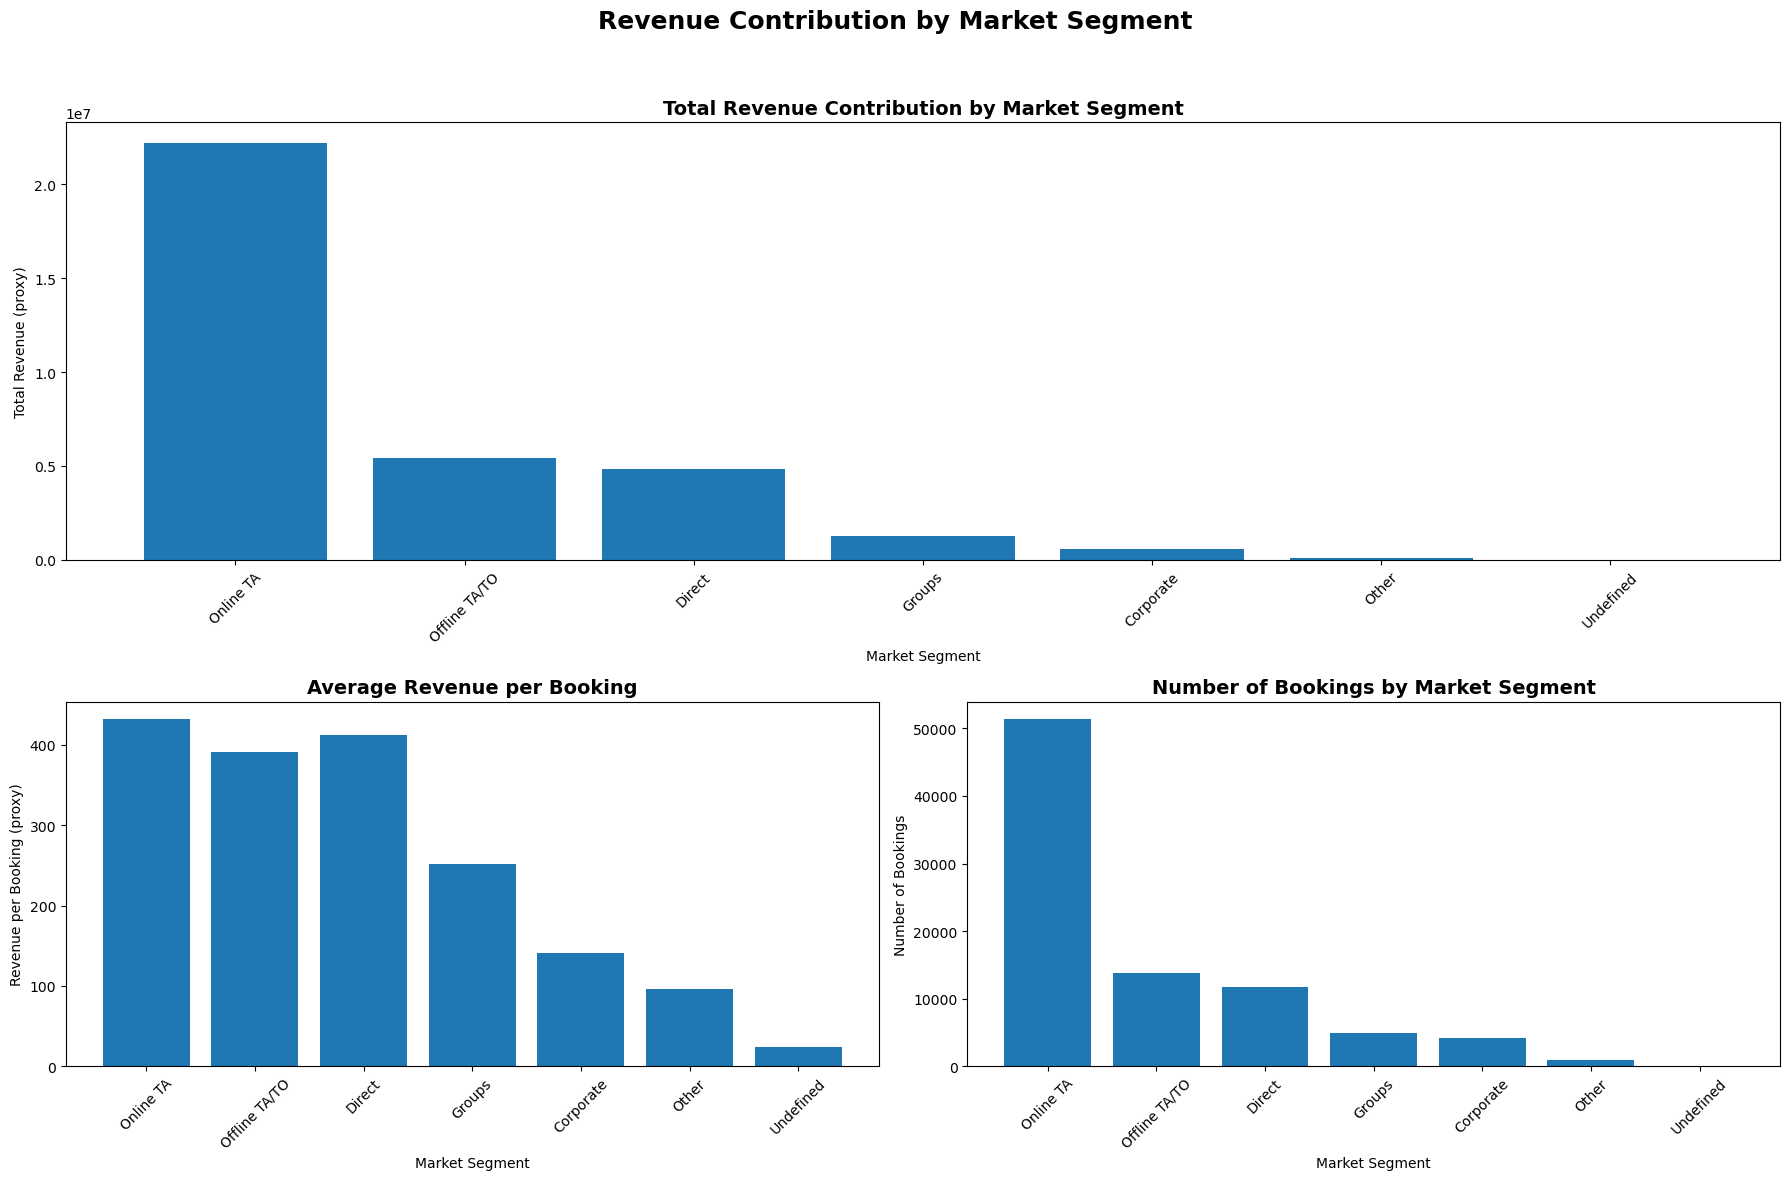

In [7]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])

fig.suptitle(
    "Revenue Contribution by Market Segment",
    fontsize=18,
    fontweight="bold"
)

# ---------- TOTAL REVENUE ----------
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(
    segment_revenue["market_segment"],
    segment_revenue["total_revenue"]
)
ax1.set_title("Total Revenue Contribution by Market Segment", fontsize=14, fontweight="bold")
ax1.set_xlabel("Market Segment")
ax1.set_ylabel("Total Revenue (proxy)")
ax1.tick_params(axis="x", rotation=45)

# ---------- AVG REVENUE PER BOOKING ----------
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(
    segment_revenue["market_segment"],
    segment_revenue["avg_revenue_per_booking"]
)
ax2.set_title("Average Revenue per Booking", fontsize=14, fontweight="bold")
ax2.set_xlabel("Market Segment")
ax2.set_ylabel("Revenue per Booking (proxy)")
ax2.tick_params(axis="x", rotation=45)

# ---------- NUMBER OF BOOKINGS ----------
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(
    segment_revenue["market_segment"],
    segment_revenue["bookings"]
)
ax3.set_title("Number of Bookings by Market Segment", fontsize=14, fontweight="bold")
ax3.set_xlabel("Market Segment")
ax3.set_ylabel("Number of Bookings")
ax3.tick_params(axis="x", rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Written Analysis

Kết quả phân tích cho thấy **Online TA là phân khúc đóng góp doanh thu lớn nhất**, với khoảng **22.2 triệu doanh thu proxy**, vượt xa các phân khúc còn lại. Điều này đến từ việc Online TA vừa có **số lượng booking rất lớn (51,370)**, vừa có **doanh thu trung bình trên mỗi booking cao ($\approx$432)**.

Hai phân khúc **Direct** và **Offline TA/TO** đứng tiếp theo về tổng doanh thu (khoảng **4.85 triệu** và **5.42 triệu**), dù số lượng booking thấp hơn đáng kể so với Online TA. Đáng chú ý, **Direct booking có doanh thu trung bình trên mỗi booking cao ($\approx$413)**, gần tương đương Online TA, cho thấy đây là phân khúc **ít booking hơn nhưng chất lượng doanh thu cao**.

Ngược lại, **Groups** và **Corporate** có doanh thu trung bình trên mỗi booking thấp hơn ($\approx$252 và $\approx$141), phản ánh đặc trưng giá thấp hoặc chính sách chiết khấu. Các nhóm **Other** và **Undefined** đóng góp không đáng kể; trong đó *Undefined* chỉ có 2 booking nên không ảnh hưởng đến kết luận chung.

Về mặt thực tiễn, khách sạn nên **duy trì Online TA để đảm bảo quy mô doanh thu**, đồng thời **đẩy mạnh kênh Direct** nhằm tối ưu doanh thu trên mỗi booking và giảm chi phí trung gian. Tuy nhiên, phân tích này sử dụng **doanh thu proxy (ADR x số đêm)** và không phản ánh chi phí hay lợi nhuận thực tế, nên các quyết định kinh doanh cần được kết hợp với dữ liệu tài chính chi tiết hơn.

---
### Q3 - Geographic Distribution of Guests
*Những quốc gia nào đóng góp nhiều lượt khách và doanh thu nhất cho khách sạn, và mức độ tập trung của nguồn khách theo từng quốc gia như thế nào?*
#### A. Preprocessing
Phân tích Q3 tập trung vào biến `country`, đại diện cho quốc gia xuất xứ của khách hàng.  
Dữ liệu đã được làm sạch ở Notebook 2, trong đó các giá trị thiếu của `country` đã được gán nhãn "Unknown" và các danh mục hiếm đã được gộp phù hợp.

Các bước xử lý:
- Sử dụng biến `total_stay_nights` và `revenue_proxy` đã được tạo ở Q1 và Q2.
- Tổng hợp dữ liệu theo từng quốc gia để đo lường:
    - Số lượng booking (lượt khách)
    - Tổng doanh thu xấp xỉ
    - Tỷ lệ hủy đặt phòng
- Giới hạn phân tích vào **Top N quốc gia** nhằm tránh nhiễu từ các quốc gia có tần suất rất thấp.

In [8]:
# Copy dataset for Q3 analysis
df_q3 = df_q2.copy()

print("Q3 preprocessing completed.")
print(df_q3["country"].value_counts().head())

Q3 preprocessing completed.
country
PRT      27312
GBR      10408
Other     9973
FRA       8798
ESP       7230
Name: count, dtype: int64


#### B. Analysis
Phân tích Q3 tập trung trả lời ba khía cạnh chính:
- **Quy mô nguồn khách theo quốc gia** $\rightarrow$ đo bằng số lượng booking để xác định các thị trường trọng điểm.
- **Mức độ đóng góp doanh thu theo quốc gia** $\rightarrow$ sử dụng tổng doanh thu proxy để đánh giá giá trị kinh tế của từng thị trường, không chỉ dựa trên số lượng khách.
- **Mức độ ổn định hành vi đặt phòng** $\rightarrow$ đánh giá thông qua tỷ lệ hủy đặt phòng theo quốc gia.

Dữ liệu được tổng hợp theo quốc gia, sau đó sắp xếp và chọn Top 10 quốc gia theo số lượng booking để trực quan hóa và diễn giải.

In [9]:
# Aggregate metrics by country
country_stats = (
    df_q3.groupby("country", observed=True)
    .agg(
        bookings=("country", "count"),
        total_revenue=("revenue_proxy", "sum"),
        cancel_rate=("is_canceled", "mean")
    )
    .reset_index()
)

# Sort by booking volume
country_stats = country_stats.sort_values(
    "bookings",
    ascending=False
)

# Select top 10 countries
top_countries = country_stats.head(10)

print("=== Top 10 countries by booking volume ===")
print(top_countries.round(2))

=== Top 10 countries by booking volume ===
   country  bookings  total_revenue  cancel_rate
13     PRT     27312     9072618.01         0.36
8      GBR     10408     4716508.13         0.19
12   Other      9973     4504461.44         0.31
7      FRA      8798     3590516.11         0.20
6      ESP      7230     2970314.93         0.26
5      DEU      5372     2107505.03         0.20
10     ITA      3052     1209418.72         0.35
9      IRL      3011     1535553.81         0.22
1      BEL      2065      884960.23         0.20
2      BRA      1983      792375.64         0.36


#### C. Results & Interpretation
##### Visualizations

Các trực quan được sử dụng để minh họa sự phân bố nguồn khách theo quốc gia gồm:
- Bar chart: số lượng booking theo quốc gia (Top 10)
- Bar chart: tổng doanh thu proxy theo quốc gia (Top 10)
- Bar chart: tỷ lệ hủy đặt phòng theo quốc gia (Top 10)

Các biểu đồ này giúp đánh giá đồng thời **quy mô**, **giá trị doanh thu**, và **mức độ ổn định** của từng thị trường quốc gia.

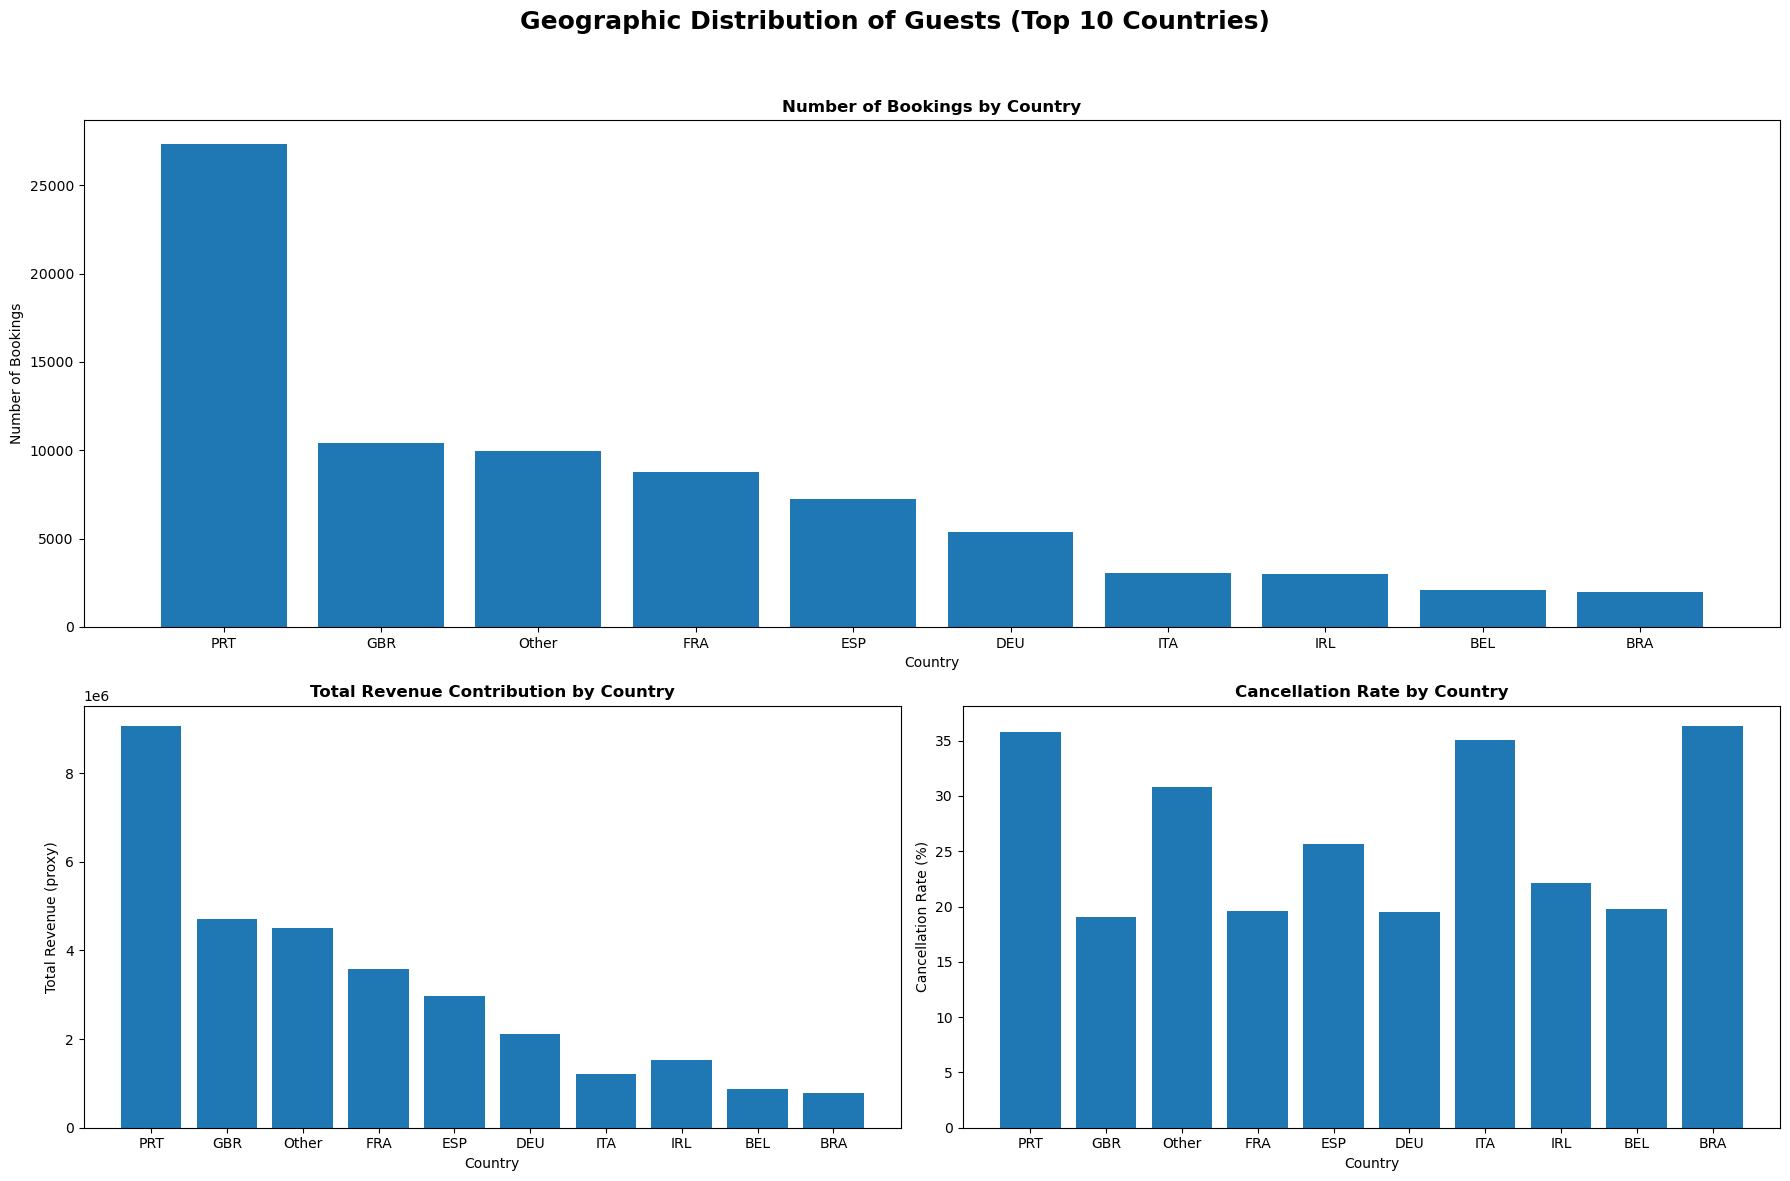

In [10]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1.2, 1])

fig.suptitle(
    "Geographic Distribution of Guests (Top 10 Countries)",
    fontsize=18,
    fontweight="bold"
)

# ---------- BOOKINGS ----------
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(
    top_countries["country"],
    top_countries["bookings"]
)
ax1.set_title("Number of Bookings by Country", fontweight="bold")
ax1.set_xlabel("Country")
ax1.set_ylabel("Number of Bookings")
ax1.tick_params(axis="x")

# ---------- TOTAL REVENUE ----------
ax2 = fig.add_subplot(gs[1, 0])
ax2.bar(
    top_countries["country"],
    top_countries["total_revenue"]
)
ax2.set_title("Total Revenue Contribution by Country", fontweight="bold")
ax2.set_xlabel("Country")
ax2.set_ylabel("Total Revenue (proxy)")
ax2.tick_params(axis="x")

# ---------- CANCELLATION RATE ----------
ax3 = fig.add_subplot(gs[1, 1])
ax3.bar(
    top_countries["country"],
    top_countries["cancel_rate"] * 100
)
ax3.set_title("Cancellation Rate by Country", fontweight="bold")
ax3.set_xlabel("Country")
ax3.set_ylabel("Cancellation Rate (%)")
ax3.tick_params(axis="x")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Written Analysis

Kết quả phân tích cho thấy **nguồn khách của khách sạn tập trung mạnh vào một số quốc gia nhất định**, cả về số lượng booking lẫn mức độ đóng góp doanh thu.

Về **quy mô khách**, **PRT (Bồ Đào Nha)** là thị trường lớn nhất với **27,312 bookings**, vượt xa các quốc gia còn lại. Các thị trường tiếp theo gồm **GBR (10,408)**, **FRA (8,798)** và **ESP (7,230)**, cho thấy khách sạn phụ thuộc đáng kể vào thị trường nội địa và các quốc gia châu Âu lân cận. Nhóm **“Other”** cũng chiếm tỷ trọng lớn (**9,973 bookings**), phản ánh nguồn khách quốc tế phân tán từ nhiều quốc gia nhỏ.

Xét về **đóng góp doanh thu**, PRT tiếp tục dẫn đầu với khoảng **9.07 triệu doanh thu proxy**, chủ yếu nhờ quy mô booking lớn. Đáng chú ý, **IRL dù chỉ xếp sau nhóm thị trường lớn về số lượng booking nhưng vẫn đạt mức doanh thu tương đối cao so với quy mô**, cho thấy mức chi tiêu hoặc thời gian lưu trú trung bình cao hơn.

Về **tỷ lệ hủy đặt phòng**, có sự khác biệt rõ rệt giữa các quốc gia. **PRT, ITA và BRA** có tỷ lệ hủy cao (khoảng **35-36%**), trong khi **GBR, FRA và DEU** ổn định hơn (khoảng **19-20%**). Điều này cho thấy không chỉ quy mô, mà **độ ổn định của nguồn khách** cũng khác nhau theo từng thị trường.

Từ góc độ thực tiễn, khách sạn nên duy trì các thị trường trọng điểm như **PRT và GBR**, đồng thời ưu tiên khai thác các quốc gia có **doanh thu tốt và tỷ lệ hủy thấp**. Tuy nhiên, phân tích này chỉ tập trung vào **Top 10 quốc gia theo số lượng booking** và sử dụng **doanh thu proxy**, nên chưa phản ánh đầy đủ lợi nhuận thực tế cũng như hành vi của các thị trường nhỏ.